In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


Funnily enough, there is no missing values in the training set... hmm

In [2]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [3]:
df.sample(5).head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
25949,25949,15643024,Ting,695,Germany,Female,38.0,2,144875.69,1,1.0,0.0,168034.90,0
9721,9721,15667289,Henderson,719,Spain,Male,26.0,8,0.00,2,0.0,0.0,10772.13,0
19511,19511,15617482,Milanesi,489,Germany,Female,52.0,3,131441.51,1,1.0,1.0,37240.11,0
569,569,15759872,Iadanza,659,France,Male,38.0,6,0.00,1,1.0,0.0,187980.23,0
32430,32430,15625395,Hsia,850,Germany,Female,50.0,7,111093.01,1,1.0,1.0,119647.60,1


In [4]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [5]:
df_exit = df.groupby('Geography')['Exited'].sum()
df_exit

Geography
France     15572
Germany    13114
Spain       6235
Name: Exited, dtype: int64

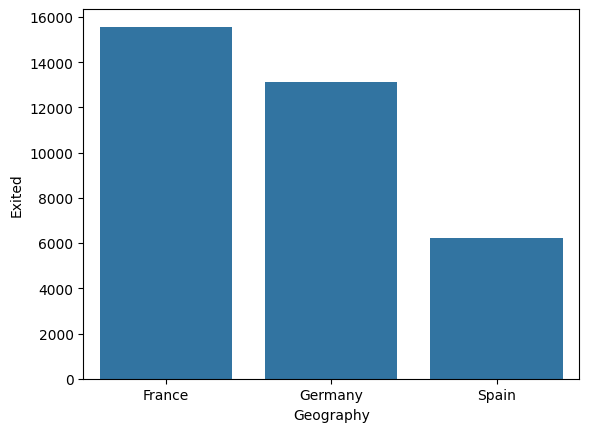

In [6]:
sns.barplot(df_exit)
plt.show()


<Axes: xlabel='Exited', ylabel='count'>

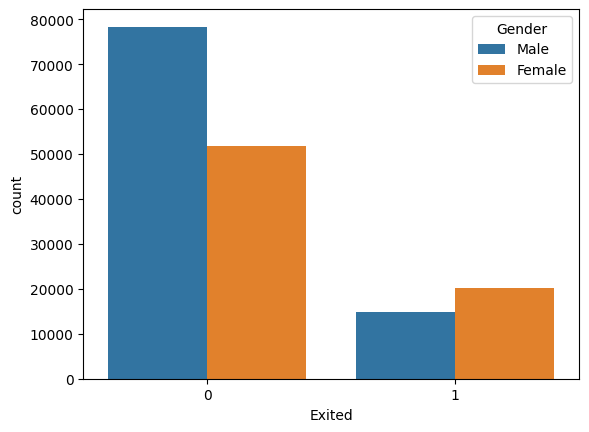

In [7]:
sns.countplot(df, x='Exited', hue='Gender')

<Axes: >

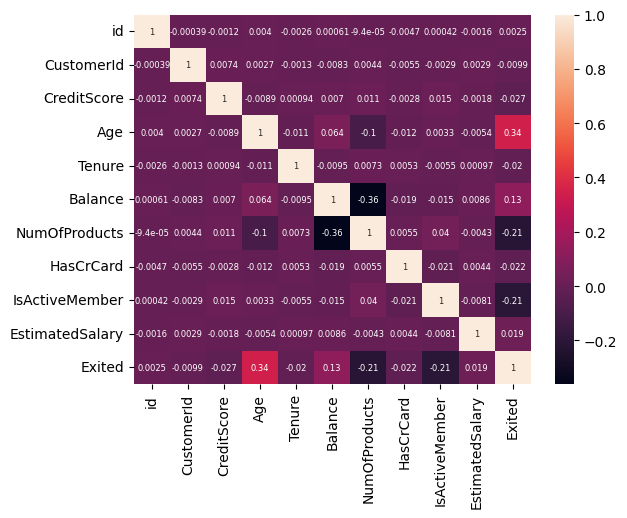

In [8]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, annot_kws={'fontsize':6})

<Axes: xlabel='Age', ylabel='Count'>

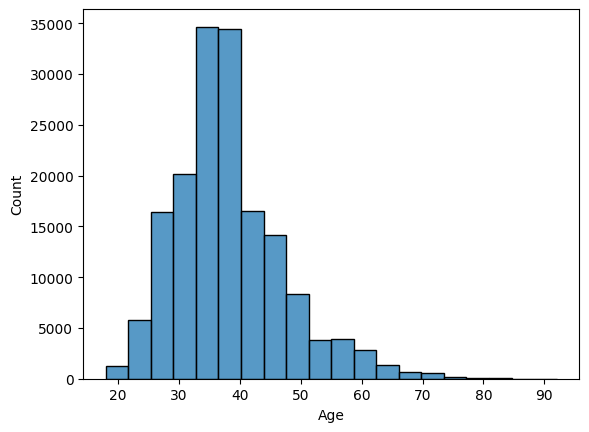

In [9]:
sns.histplot(df, x='Age', bins=20)

## Feature Engineering/Selection

In [10]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Intuitively, we know that `id`, `CustomerId`, `Surname` are not useful as features. We can drop them.

In [11]:
df.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [12]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 12.6+ MB


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

cat_features = list(X[['Geography', 'Gender']].columns)
num_features = list(X.drop(['Geography', 'Gender'], axis=1).columns)

In [15]:
numeric_steps = [
    ('scaler', StandardScaler())
    ]

numeric_transformer = Pipeline(numeric_steps)

cat_steps = [
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]
cat_transformer = Pipeline(cat_steps)


In [16]:
preprocessor = ColumnTransformer(
    transformers = [
    ('num', numeric_transformer, num_features),
    ('cat', cat_transformer, cat_features)
]
)

Then, we split the data

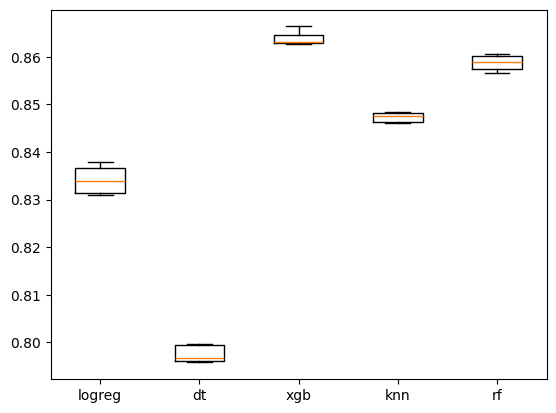

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score

models = {
    "logreg": LogisticRegression(),
    "dt": DecisionTreeClassifier(),
    'xgb': xgb.XGBClassifier(),
    'knn': KNeighborsClassifier(),
    'rf': RandomForestClassifier()
}

res = []

for model in models.values():
    clf = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ]
    )
    cv_score = cross_val_score(clf, X, y)
    res.append(cv_score)

plt.boxplot(res, labels=models.keys())
plt.show()

## Select model and tune

We select a few models that have higher cross-validation score. We will tune the hyperparameters using `RandomizedSearchCV`.

#### XGB

In [18]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

estimator = xgb.XGBClassifier()

clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', estimator)
    ]
)

params = {
    'classifier__n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
    'classifier__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'classifier__min_child_weight': [1, 3, 5, 7, 9],
    'classifier__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'classifier__reg_alpha': [0, 0.01, 0.1, 1, 10, 100],
    'classifier__reg_lambda': [0.01, 0.1, 1, 10, 100],
}

random_xgb = RandomizedSearchCV(
    estimator=clf,
    param_distributions=params,
    cv=5,
    n_jobs=-1
)

random_xgb.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['CreditScore',
                                                                                'Age',
                                                                                'Tenure',
                                                                                'Balance',
                                                                                'NumOfProducts',
                                                                                'HasCrCard',
                                                                                'IsActiveMember',
                                                                                'EstimatedSalary']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Geography',
                                                                                'Gende...
                                        'classifier__learning_rate': [0.01,
                                                                      0.05, 0.1,
                                                                      0.15, 0.2,
                                                                      0.3],
                                        'classifier__max_depth': [3, 4, 5, 6, 7,
                                                                  8, 9, 10],
                                        'classifier__min_child_weight': [1, 3,
                                                                         5, 7,
                                                                         9],
                                        'classifier__n_estimators': [100, 200,
                                                                     300, 400,
                                                                     500, 600,
                                                                     700, 800,
                                                                     900,
                                                                     1000],
                                        'classifier__reg_alpha': [0, 0.01, 0.1,
                                                                  1, 10, 100],
                                        'classifier__reg_lambda': [0.01, 0.1, 1,
                                                                   10, 100],
                                        'classifier__subsample': [0.6, 0.7, 0.8,
                                                                  0.9, 1.0]})

In [19]:
random_xgb.best_params_

{'classifier__subsample': 0.8,
 'classifier__reg_lambda': 100,
 'classifier__reg_alpha': 100,
 'classifier__n_estimators': 900,
 'classifier__min_child_weight': 9,
 'classifier__max_depth': 7,
 'classifier__learning_rate': 0.1,
 'classifier__gamma': 0.4,
 'classifier__colsample_bytree': 0.7}

In [20]:
random_xgb.best_score_

0.8656701033677786

#### KNN

In [22]:
params = {
    'classifier__n_neighbors': list(range(1, 11)),  # Testing a wide range of neighbors
    'classifier__weights': ['uniform', 'distance'],  # Testing both uniform and distance-based weights
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Different algorithms
    'classifier__leaf_size': [10, 20, 30, 40, 50],  # Various leaf sizes
    'classifier__p': [1, 2]  # Testing both Manhattan (p=1) and Euclidean (p=2) distances
}

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
random_knn = RandomizedSearchCV(estimator=clf,
                       param_distributions=params,
                       cv=5,
                       n_jobs=-1)

random_knn.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['CreditScore',
                                                                                'Age',
                                                                                'Tenure',
                                                                                'Balance',
                                                                                'NumOfProducts',
                                                                                'HasCrCard',
                                                                                'IsActiveMember',
                                                                                'EstimatedSalary']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Geography',
                                                                                'Gender'])])),
                                             ('classifier',
                                              KNeighborsClassifier())]),
                   n_jobs=-1,
                   param_distributions={'classifier__algorithm': ['auto',
                                                                  'ball_tree',
                                                                  'kd_tree',
                                                                  'brute'],
                                        'classifier__leaf_size': [10, 20, 30,
                                                                  40, 50],
                                        'classifier__n_neighbors': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10],
                                        'classifier__p': [1, 2],
                                        'classifier__weights': ['uniform',
                                                                'distance']})

In [23]:
random_knn.best_params_

{'classifier__weights': 'uniform',
 'classifier__p': 2,
 'classifier__n_neighbors': 8,
 'classifier__leaf_size': 20,
 'classifier__algorithm': 'kd_tree'}

In [24]:
random_knn.best_score_

0.8551086472688324

#### Random Forest

In [27]:
estimator = RandomForestClassifier()

clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', estimator)
    ]
)

params = {
    'classifier__n_estimators': [100, 200, 300, 400, 500], 
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],    
    'classifier__min_samples_split': [2, 5, 10],            
    'classifier__min_samples_leaf': [1, 2, 4],              
    'classifier__max_features': ['auto', 'sqrt', 'log2'],   
    'classifier__bootstrap': [True, False],                 
    'classifier__criterion': ['gini', 'entropy'],           
    'classifier__class_weight': [None, 'balanced'],         
}

random_rf = RandomizedSearchCV(
    estimator=clf,
    param_distributions=params,
    cv=5,
    n_jobs=-1
)

random_rf.fit(X, y)

c:\Users\ashsy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ashsy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ashsy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ashsy\AppData\

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['CreditScore',
                                                                                'Age',
                                                                                'Tenure',
                                                                                'Balance',
                                                                                'NumOfProducts',
                                                                                'HasCrCard',
                                                                                'IsActiveMember',
                                                                                'EstimatedSalary']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Geography',
                                                                                'Gende...
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__class_weight': [None,
                                                                     'balanced'],
                                        'classifier__criterion': ['gini',
                                                                  'entropy'],
                                        'classifier__max_depth': [None, 10, 20,
                                                                  30, 40, 50],
                                        'classifier__max_features': ['auto',
                                                                     'sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300, 400,
                                                                     500]})

In [28]:
random_rf.best_params_

{'classifier__n_estimators': 300,
 'classifier__min_samples_split': 2,
 'classifier__min_samples_leaf': 2,
 'classifier__max_features': 'sqrt',
 'classifier__max_depth': 20,
 'classifier__criterion': 'gini',
 'classifier__class_weight': None,
 'classifier__bootstrap': True}

In [29]:
random_rf.best_score_

0.8626222428169855

Let's check the model best params and score.

In [44]:
best_model = random_xgb.best_estimator_

Lets predict on test set

In [45]:
df_test = pd.read_csv('../data/test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [46]:
cust_id = df_test['id']
df_test.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)
df_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [47]:
pred = best_model.predict(df_test)

output = pd.DataFrame({
    'id': cust_id,
    'Exited': pred
})

output.head()

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0


In [48]:
output.to_csv('../data/submission_xgb.csv', index=False)